# Redes Neuronales - TP2

Autor: Gustavo Quintero

23 de Noviembre 2022

## 1. Librerias

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import math
import random

## 2. Introducción

### 2.1 El Perceptrón

El perceptrón es un modelo matemático inspirado en la estructura y función simplificada de una única neurona biológica.

### 2.1.1 Perceptrón Simple.

Se define como una función $g: R^n\longrightarrow\lbrace-1.1\rbrace$, que asocia un vector (patrón de entrada) $\xi = (\xi_1, \xi_2,\ldots,\xi_n)^T\in R^n$ con $O\in\lbrace-1, 1\rbrace$ (patrón de salida deseada) de la forma $O=g(\xi)$.

Dado un conjunto de $p$-patrones de entrenamiento, sea el conjunto de pares.

$$\lbrace(\xi^\mu, O^\mu):1\leq\mu\leq p\rbrace$$

donde $\xi^\mu\in R^n$ y $g(\xi^\mu)=O^\mu\in\lbrace -1, 1\rbrace\hspace{0.5cm}1\leq\mu\leq p$.

Así; 

El problema consiste en asociar: Un patrón partícular de salida $\zeta_i^\mu$ en respuesta a un patrón de entrada $\xi_i^\mu$. Esto es, se quiere que el patrón de salida  ´´real'' $O_i^\mu$ asociado con $\xi_i^\mu$ coincida con $\xi_i^\mu$. Es decir, $O_i^\mu=\zeta_i^\mu$ para cada $1\leq i\leq n$ y $1\leq\mu\leq p$.

Un perceptrón simple está constituido por:

- **Patrón de entrada**: $\xi=(\xi_1,\xi_2,\xi_3,\ldots,\xi_n)$ donde $\xi_i\in\lbrace -1, 1\rbrace\;$ $1\leq i\leq n$.

- **Pesos sinápticos**: $\omega_{ij}$ representan el peso de la conexión de la neurona $j$ a la $i$ con $\omega_{ij}\neq\omega_{ji}$ con $1\leq i,j \leq n$.

- **Función de propagación (o entrada neta)**: Proporciona el valor del potencial postsináptico, $h_i$ de la neurona $i-ésima$, como la suma ponderada de las entradas $\xi_k$ con los pesos sinápticos $\omega_{ik}$, es decir  $$h_i=\sum_{k=1}^{n+1}\omega_{ik}\xi_k$$

- **Función de activación**: $g(x)=sgn(x)$ determina la salida de la red, para así, obtener $O_i$ salida de la neurona $i$, como   $$O_i=g(h_i)=g(\sum_{k=0}^{n}\omega_{ik}\xi_{k})$$.

  En algunos casos en la función de activación la neurona no se activa hasta que su estado supera un determinado valor (valor umbral, valor de la intensidad de interacción de la neurona $i$).

  En esta descripción se considera un umbral como el peso sináptico correspondiente a conexiones de un patrón de entrada que esta fijado en $\xi_{n+1}=1$ con peso $\omega_{in+1}=\theta_i$, entonces $$O_i=g(\sum_{k=1}^{n}\omega_{ik}\xi_{k}+\omega_{in+1}\xi_{n+1})$$ $$O_i=g(\sum_{k=1}^{n}\omega_{ik}\xi_{k}-\theta_i)$$
  
  Y se define la función $g:\lbrace -1, 1\rbrace^n\longrightarrow\lbrace-1, 1\rbrace$ por
  
  $$g(\sum_{k=1}^{n}\omega_{ik}\xi_{k})=\left\{ \begin{array}{lcc} 1 &   ,si  &\sum_{k=1}^{n}\omega_{ik}\xi_{k}  \geq \theta \\ \\ -1 &  ,si & \sum_{k=1}^{n}\omega_{ik}\xi_{k} < \theta \end{array} \right.$$ 
  
  La fórmula de hallar la salida real es
  
  $$O = g(W\cdot\xi)$$
  
  donde
   - $W=(\omega_1, \omega_2, \ldots, \omega_n)$ con $\omega_k$   peso sináptico $1\leq k\leq n$, es la matriz de pesos.
   
   - $\xi = (\xi_1, \xi_2, \ldots, \xi_n)$
   
  Por otro lado, en el perceptrón simple cuando la entrada $\xi$ coincide con un patrón de entrenamiento $\xi^\mu$ $1\leq\mu\leq p$, esto es, $\xi=\xi^\mu$ éste produce una salida $O^\mu$ dada por
  
  $$O^\mu=sgn(W\cdot\xi^\mu)\hspace{1cm} 1\leq\mu\leq p$$
  
  De este modo que sí:
   - $O^\mu=\zeta^\mu$ (salida deseada), el problema esta resuelto
   - $O^mu\neq\zeta^\mu$, entonces los $\omega_k$ se modifican iterativamente en una cantidad proporcional al error producido entre la salida deseada y la salida real. La constante de proporcionalidad es un parámetro positivo llamado **tasa de aprendizaje $\eta$**; porque a mayor valor más se modifican los pesos sinápticos y viceversa.
  
  La función de activación puede ser no lineal y de distintos tipos:
  
  - **Función signo**: Utiliza la unidad de proceso bipolar $\lbrace -1, 1\rbrace$ y se define como $g:\lbrace -1, 1\rbrace^n\longrightarrow\lbrace -1, 1\rbrace$  
  
  $$g(x)=sgn(x)= \left\{ \begin{array}{lcc} 1 &   ,si  & x \geq 0 \\ \\ -1 &  ,si & x < 0 \end{array} \right.$$ 
   
  - **Función de heaviside**: Utiliza la unidad de proceso binario $\lbrace 0, 1\rbrace$. Así, $g:\lbrace -1, 1\rbrace^n\longrightarrow \lbrace 0, 1\rbrace$ definida por 
  
  $$g(x)= \left\{ \begin{array}{lcc} 1 &   ,si  & x \geq 0 \\ \\ 0 &  ,si & x < 0 \end{array} \right.$$
  
  - **Función sigmoide**: $g:R^n\longrightarrow [0, \infty+)$ definida por 
  
  $$g(x)=1/(1+e^{-x})\hspace{1cm}\hspace{1cm}\vee x\in R^n$$
  - **Función tangente hiperbólica**: $g:R^n\longrightarrow[-1,1]$ definida por 
  
  $$g(x)=tanh(x)$$.
  
 <img src="PerceptronS.jpg" width="650">
  
### 2.1.2 Aprendizaje del Perceptrón Simple

La red del perceptrón simple utiliza un algoritmo de entrenamiento de tipo supervisado, esto es; se presenta a la red un conjunto de patrones de entrada junto con la salida deseada. Los pesos se van modificando de manera proporcional al error que se produce entre la salida real y la salida deseada.

Una vez finalizada la fase de aprendizaje, la red puede ser utilizada para realizar la tarea para la que fue entrenada.

Una de la principales ventajas que posee este modelo es que la red aprende la relacion existente entre los datos adquiriendo la capacidad de generalizar conceptos. De esta manera, una red neuronal puede clasificar correctamente muestras que no tenia durante el entrenamiento.

- La regla para modiciar los pesos sinápticos en el perceptrón simple se conoce con el nombre de regla de aprendizaje y viene dada por la expresión. 

  $$\left\{ \begin{array}{lc} \omega_j(k+1)=\omega_j(k) + \bigtriangleup\omega_j(k), &   k=1,2,...  & \\ \\ \bigtriangleup\omega_j(k) = \eta(k)[O(k)-\zeta(k)]\xi_k(k),& \eta(k)=\theta(k)& \end{array} \right.$$
 
  Esto es, el nuevo peso sináptico esta dado por
  
  $$\omega_j(k+1)=\omega_j(k)+\eta(k)[O(k)-\zeta(k)]\xi_j(k)$$

  Cuando se emplea la función signo, la regla de aprendizaje se puede escribir de la siguiente forma
  
  $$\omega_j(k+1)=\left\{ \begin{array}{lc} \omega_j(k) + 2\eta(k)\xi_i(k), & si\hspace{0.5cm}\zeta=-1\;y\;O=1& \\ \\ \omega_j(k),& si\hspace{0.5cm}\zeta=O &\\ \\ \omega_j(k)-2\eta(k)\xi_j(k),& si\hspace{0.5cm}\zeta=1\;y\;O=-1&\end{array} \right.$$

  Esta regla de aprendizaje es un método de detección del error y corrección. Solo aprende, es decir, modifica los pesos, cuando se equivoca.
  
 ### 2.2 Perceptrón Multicapa
 
 Un perceptrón multicapa es una generalización del perceptrón simple y para ello incorpora capas de neuronas  ocultas, con las cuales consigue representar funciones que no necesariamente son funciones umbral (problemas no linealmente separables).
 
 El perceptrón multicapa esta compuesto por una capa de entrada, una capa de salida y un número determinado de capas ocultas intermedias.
 
 La capa de entrada tiene como función introducir los patrones de entrada a la red y distribuirlos a todas las neuronas de las siguientes capas la capa de salida de la respuesta de la red asociada a cada uno de los patrones de entrada.
 
 La neuronas de las capas ocultas realizan un procesamiento no lineal de los patrones recibidos y cuyas salidas pasan a neuronas posteriores.
 
 Las conexiones del perceptrón multicapa llevan asociado un número real, llamado peso de la conexión. Todas las neuronas de la red llevan también asociado un umbral, que en el caso del perceptrón multicapa suele tratarse como una conexión más a la neurona, cuya entrada es constante.
 
 En el perceptrón multicapa se pueden diferenciar dos fases:
 
 1. **Propagación de los patrones de entrada** en la que se calcula el resultado de la salida de la red a partir de los valores de entrada hacia delante, esto significa que la ruta del patrón a través de las neuronas solo va en una dirección.
 
    El perceptrón multicapa se define como una función $g:R^n\longrightarrow R^m$ que asocia a cada vector (patrón de entrada) $\xi=(\xi_1,\xi_2,\ldots\xi_n)^T\in R^n$ con el vector (patrón de salida)   $O=(O_1,O_2,\ldots O_m)^T\in R^m$ de la forma
    
    $$O=g(\xi)$$
    
    Dado un conjunto de $p$-pares de patrones de entrenamiento.
    
    $$\lbrace (\xi^\mu,\zeta^\mu): 1\leq\mu\leq p\rbrace$$
    
    donde $\xi^\mu\in R^n$ y $\zeta^\mu\in R^m$ (patrón deseado) $1\leq\mu\leq p$.
    
    El problema consiste en asociar: Un patrón particular de salida deseado $\zeta^\mu_i\; (1\leq i\leq m)$ en respuesta a un patrón de entrada $\xi_k^\mu\; (1\leq i\leq m)$. Esto es, se quiere que el patrón de salida real $O_i^\mu\; (1\leq i\leq m)$ asociado con $\xi_k^\mu$ coincida con $\zeta_i^\mu$. Es decir, $O_i^\mu=\zeta_i^\mu$ para cada $1\leq i\leq m$ y $1\leq \mu\leq p$.
    
    Veamos cómo funciona el perceptrón multicapa con una capa oculta, formado por $l$ neuronas ocultas. En la $i$-ésima neurona en la red, la salida real $O_i$, se obtiene por:
    
    $$O_i^\mu=g(\sum_{i=1}^{l}\omega_{ij}V_{j}^{\mu})=g(\sum_{j=1}^{l}\omega_{ij}g(\sum_{k=1}^n\omega_{jk}\xi_{k}^{\mu}))\hspace{2cm}(1)$$
    
    para cada $1\leq i\leq m$.
    
    donde
    
     - $O_i^\mu$ salida real de la $i$-ésima neurona de la red.
     - $V_j^\mu$ salida de la $j$-ésima neurona de la red
     - $\xi_k^\mu$ entrada a la $k$.ésima neurona de la red.
     - $\omega_{ij}$ peso sináptico de la neuro $i$ de la salida con la neurona $j$ de la capa oculta.
     - $g$ función de activación de las neuronas de la capa de salida y de la capa oculta, respectivamente.
     - $\omega_{jk}$ peso sináptico de la neurona $k$ de la capa de entrada con la neurona $j$ de la capa oculta.
     
    La función de activación va a ser una función diferenciable y no decreciente (pero no siempre) y puede ser de distintos tipos:
     - Función sigmoide
     - Función tangente hiperbolica
     - Función signo
     - Función Heaviside
 
  <img src="PM.jpg" width="450">
  
 2. **Aprendizaje o entrenamiento** en la que los pesos sinápticos de la red se van modificando según un determinado algoritmo hasta obtener la salida deseada. En este trabajo practico se emplean diferentes algoritmos de modificación de los pesos sinápticos de la red. Entre ellos esta el algoritmo de **Backpropagation**, el cual consiste en que los errores obtenidos en la salida del perceptrón se van propagando hacia atrás, esto es, se van a  minimizar con el objetico de modificar los pesos para que el valor de la salida real se aproxime al valor deseado mediante la función error.
    
    La función error $E$ mide de una manera númerica la diferencia existente entre la salida real y la salida deseada, y esta dada por.
    
    $$E(\omega)=\sum_{\mu=1}^{p}\sum_{i=1}^{m}(\zeta_i^{\mu}-O_i^{\mu})^2$$
    
    Y por $(1)$, se tiene que $$E(\omega)=\sum_{\mu=1}^{p}\sum_{i=1}^{m}(\zeta_i^\mu-g(\sum_{j=1}^{l}\omega_{ij}g(\sum_{k=1}^{n}\omega_{jk}\xi_{k}^{\mu})))^2$$.
    
    De modo que, el aprendizaje de la red se formula como un problema de minimización de la función error. Ya que una pequeña variación del vector de pesos $W$ hace que el error decrezca más rapidamente.
    
    - **Modificación de los pesos sinápticos de la capa de salida** $$\omega_{ij}(k+1)=\omega_{ij}(k)+\eta\delta_iV_j(k)\hspace{0.5cm} 1\leq j\leq n+1$$
    
       donde 
         - $\delta_i = (\zeta_i^\mu(k)-O_i^\mu(k))g'(h_i^\mu)$
         - $h_i^{\mu}=\sum_{j=1}^l\omega_{ij}V_j(k)$   
    
    - **Modificación de los pesos sinápticos de la capa oculta**
    $$\Delta\omega_{ik}=-\eta\frac{\partial E}{\partial\omega_{jk}}=-\eta\sum_{\mu=1}^{p}\frac{\partial E}{\partial V_j^\mu}\frac{\partial V^\mu}{\partial\omega_{jk}}$$
    
       Así,
       
       $$\omega_{jk}(k+1)=\omega_{jk}(k)+\eta\delta_j\xi_{k}^\mu(k)\hspace{0.5cm}j=1,\ldots,n+1\;k=1,\ldots,n$$
       
       donde
         - $\delta_j = \delta_i\omega_{ij}(k)g'(h_j^{\mu})$
         - $h_j=\sum_{k=1}^n\omega_{jk}\xi_k^\mu$
       
    Este error es el cometido al introducir el $\mu$-ésimo patrón.
    
    Tambien es posible realizar un entrenaiento por grupos, en cuyo caso se introducien los $p$-patrones simultaneamente.

## 3. Problemas

### 3.1 Implemente un perceptrón simple que aprenda la función lógica AND de 2 y de 4 entradas. Lo mismo para la función lógica OR. Para el caso de 2 dimensiones, grafique la recta discriminadora y todos los vectores de entrada de la red.

Primero se definen las funciónes a emplear para crear y entrenar un perceptrón simple.

In [2]:
def signo(h):
    if h >= 0:
        s = 1
    else:
        s = -1
    return s

def perceptron_simple_train(x, z, eta):
    W = np.random.random(int(np.size(x)/len(x))+1)
    x = [np.append(np.array(sample),1) for sample in x]
    E = sum([(z[index] - signo(np.dot(sample, W)))**2 for index, sample in enumerate(x)])
    while E != 0:
        for index, sample in enumerate(x):
            y = signo(np.dot(sample, W))
            while y != z[index]:
                W += eta*(z[index]-y)*sample
                y = signo(np.dot(sample, W))
        E = sum([(z[index] - signo(np.dot(sample, W)))**2 for index, sample in enumerate(x)])
    return W

def perceptron_simple(W, x):
    return [signo(np.dot(np.append(sample, 1), W)) for sample in x]

Luego se procede a entrenar y evaluar la red con la función lógica AND y OR de 2 y de 4 entradas respectivamente.

**Función lógica AND**
  - Dos entradas

In [3]:
x = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
y = np.array([1, -1, -1, -1])
W1 = perceptron_simple_train(x, y, eta = 0.05)
perceptron_simple(W1, x) == y

array([ True,  True,  True,  True])

- Cuatro entradas

In [4]:
x = np.array([[-1, -1, -1, -1], [-1, -1, -1, 1], [-1, -1, 1, -1], [-1, 1, -1, -1], [1, -1, -1, -1], [-1, -1, 1, 1], 
              [1, 1, -1, -1], [-1, 1, -1, 1], [1, -1, 1, -1],[-1, 1, 1, -1], [1, -1, -1, 1], [-1, 1, 1, 1], 
              [1, 1, 1, -1], [1,-1, 1, 1], [1, 1, -1, 1], [1, 1, 1, 1]])

y = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1])

W = perceptron_simple_train(x, y, eta = 0.25)
perceptron_simple(W, x) == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

**Función lógica OR** 

- Dos entradas 

In [5]:
x = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = np.array([-1, 1, 1, 1])
W2 = perceptron_simple_train(x, y, eta = 0.05)
perceptron_simple(W2, x) == y

array([ True,  True,  True,  True])

- Cuatro entradas

In [6]:
x = np.array([[-1, -1, -1, -1], [-1, -1, -1, 1], [-1, -1, 1, -1], [-1, 1, -1, -1], [1, -1, -1, -1], [-1, -1, 1, 1], 
              [1, 1, -1, -1], [-1, 1, -1, 1], [1, -1, 1, -1],[-1, 1, 1, -1], [1, -1, -1, 1], [-1, 1, 1, 1], 
              [1, 1, 1, -1], [1,-1, 1, 1], [1, 1, -1, 1], [1, 1, 1, 1]])

y = np.array([-1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
W = perceptron_simple_train(x, y, eta = 0.25)
perceptron_simple(W, x) == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

Por último, se la gráfica de la recta discriminadora (a partir de los pesos sinápticos $\omega_{ik}$ obtenidos luego de realizar el entrenamiento) de los vectores de entrada de la red, para el caso de las funciones lógicas AND/OR de dos entradas.

<IPython.core.display.Javascript object>


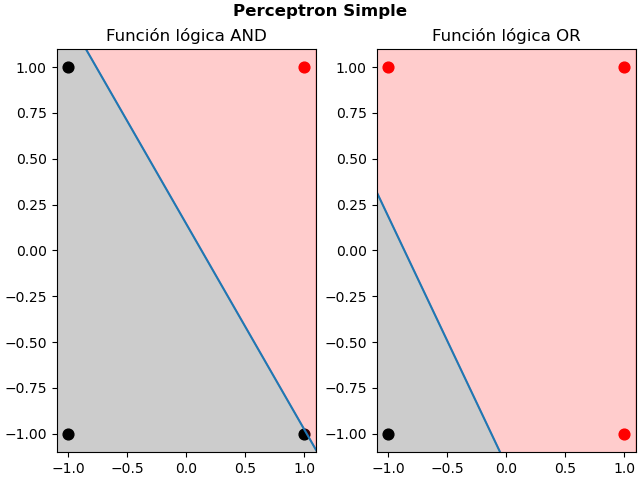

In [7]:
x = np.array([i/10 for i in range(-12, 12, 1)])
y = np.array([i/10 for i in range(-12, 12, 1)])
y1 = (-W1[0]*x-W1[2])/W1[1]
y2 = (-W2[0]*x-W2[2])/W2[1]


fig, axes = plt.subplots(ncols=2, nrows=1, constrained_layout=True)
axes[0].scatter([1, -1, -1], [-1, 1, -1], s = 60, color= 'k')
axes[0].scatter([1], [1], s = 60, color= 'r')
axes[0].plot(x, y1, linewidth=1.5)
axes[0].set(ylim=(-1.1, 1.1), xlim=(-1.1, 1.1))
axes[0].fill_between(x, -1.2,y1, color = 'k', alpha = 0.2)
axes[0].fill_between(x, y1, 150, color = 'r', alpha = 0.2)
axes[0].set_title('Función lógica AND')

axes[1].scatter([1, -1, 1], [1, 1, -1], s = 60, color= 'r')
axes[1].scatter([-1], [-1], s = 60, color= 'k')
axes[1].plot(x, y2, linewidth=1.5)
axes[1].set(ylim=(-1.1, 1.1), xlim=(-1.1, 1.1))
axes[1].fill_between(x, -1.2,y2, color = 'k', alpha = 0.2)
axes[1].fill_between(x, y2, 150, color = 'r', alpha = 0.2)
axes[1].set_title('Función lógica OR')
fig.suptitle('Perceptron Simple',fontweight ="bold")
plt.show()

### 3.2 Determine numéricamente cómo varia la capacidad del perceptrón simple en función del número de patrones enseñados.

La capacidad del perceptrón simple, $C$, es la cantidad más grande de $p$-pares aleatorios de patrones que puede aprender y pudiera resolver. Y depende de la separabilidad lineal de los patrones.

El perceptrón simple se usa para clasificar sus patrones de entrada en dos grupos de patrones linealmente separables; esto es, sí se realiza una representación gráfica de las respuesta de la red de valor 1 se deben poder separar mediante una recta, de las respuestas de valor -1.

Dados $p$-patrones de entrada $\xi^p\hspace{0.1cm}(1\leq \mu\leq p)$ con $n$ unidades elegidas aleatoriamente.

- Y el conjunto de $p$-pares $$\lbrace (\xi^\mu,\zeta^\mu):\zeta^\mu \text{salida deseada con} 1\leq\mu\leq p\rbrace$$

- Cada $p$-par entrada-salida es un problema de clasficiación. Así, se desea conocer cuantos $p$-pares aleatorios se pueden esperar resolver entrenando un perceptrón simple para comprobar si aprende o no el problema. Por lo tanto
  1. Se define una dimensión $n$ del $p$-par. 
  2. Se crea un $p$-par aleatorio $(\xi^\mu, \zeta^\mu)\hspace{0.5cm}1\leq p\leq n$
  3. Calcular la salida real $O^\mu$, tal que si.
     -  $O^\mu =\zeta^\mu$, entonces se contabiliza el $p$-par aprendido con el contador $C(p,N)$.
     -  $O^\mu \neq\zeta^\mu$, entonces $\omega_k$ se modifica iterativamente aplicando (I). 
  4. Se repite 1-3 $N$ veces para diferentes $n$.
  5. Se gráfica $C(p,N)/N$.
 
El contador $C(p,N)$ indica cuantas veces el perceptrón aprendió, por lo tanto $C(p,N)/N$ es la tasa de aprendizaje.

Antes de obtener la variabilidad de la capacidad es necesario modificar la función de aprendizaje del perceptrón, para poder establecer una condición de corte del algoritmo cuando se le presenten $p$-pares que no son linealmente separables. Además, la devolución de la función de entrenamiento debe ser el valor del error obtenido durante el mismo. 

In [8]:
def perceptron_train(x, z, eta):
    W = np.random.random(int(np.size(x)/len(x))+1)
    for i in range(len(x)*2):
        for index, sample in enumerate(x):
            sample = np.append(sample, 1)
            y = signo(np.dot(sample, W))
            while y != z[index]:
                W += eta*(z[index]-y)*sample
                y = signo(np.dot(sample, W))
        E = sum([(z[index] - signo(np.dot(np.append(sample, 1), W)))**2 for index, sample in enumerate(x)])
    return E

In [9]:
C = {}
for N in range(5,25,5):
    C[N] = {}
    P = []
    Y = []
    Error = []
    for p in range(2,82,2):
        AP = 0
        Error_ = []
        for i in range(100):
            x = [np.where(np.random.randint(2, size=N) == 0, -1, 1) for n in range(p)]
            y = np.where(np.random.randint(2, size=p) == 0, -1, 1)
            eta = 0.25
            if perceptron_train(x, y, eta) == 0:
                AP += 1
            else:
                Error_.append(perceptron_train(x, y, eta))
        P.append(p)
        Y.append(AP/100)
        Error.append(np.mean(np.array(Error_)))
    C[N]['AP/REP'] = Y
    C[N]['P'] = P
    C[N]['Error'] = Error

C:\Users\54112\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\54112\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


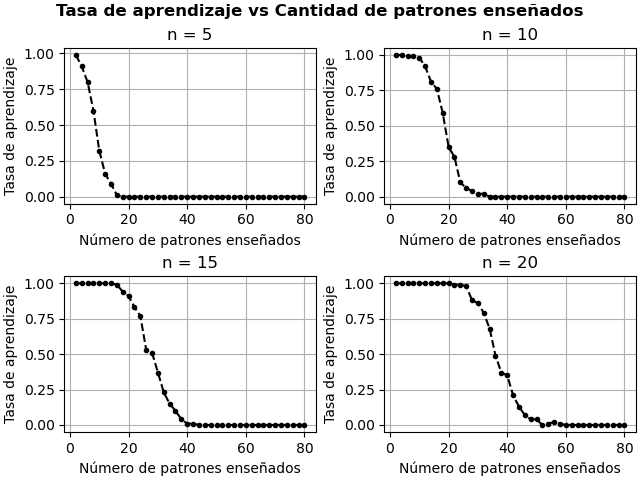

In [10]:
fig, axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)

axes[0, 0].set_title('n = 5')
axes[0, 0].set_ylabel('Tasa de aprendizaje')
axes[0, 0].set_xlabel('Número de patrones enseñados')
axes[0, 0].plot(C[5]['P'], C[5]['AP/REP'], '.--k')
axes[0, 0].grid()

axes[0, 1].set_title('n = 10')
axes[0, 1].set_ylabel('Tasa de aprendizaje')
axes[0, 1].set_xlabel('Número de patrones enseñados')
axes[0, 1].plot(C[10]['P'], C[10]['AP/REP'], '.--k')
axes[0, 1].grid()

axes[1, 0].set_title('n = 15')
axes[1, 0].set_ylabel('Tasa de aprendizaje')
axes[1, 0].set_xlabel('Número de patrones enseñados')
axes[1, 0].plot(C[15]['P'], C[15]['AP/REP'], '.--k')
axes[1, 0].grid()

axes[1, 1].set_title('n = 20')
axes[1, 1].set_ylabel('Tasa de aprendizaje')
axes[1, 1].set_xlabel('Número de patrones enseñados')
axes[1, 1].plot(C[20]['P'], C[20]['AP/REP'], '.--k')
axes[1, 1].grid()

fig.suptitle('Tasa de aprendizaje vs Cantidad de patrones enseñados',fontweight ="bold")
plt.show()

Se puede observar que la capacidad del perceptrón simple frente a patrones generados de manera aleatoria, esta directamente relacionada con la cantidad y longitud de los patrones enseñados. Esto es, la tasa de aprendizaje disminuye a menos del 40% a partir de una cantidad de patrones enseñados proporcional a $2n$ (dos veces su longitud).

<IPython.core.display.Javascript object>


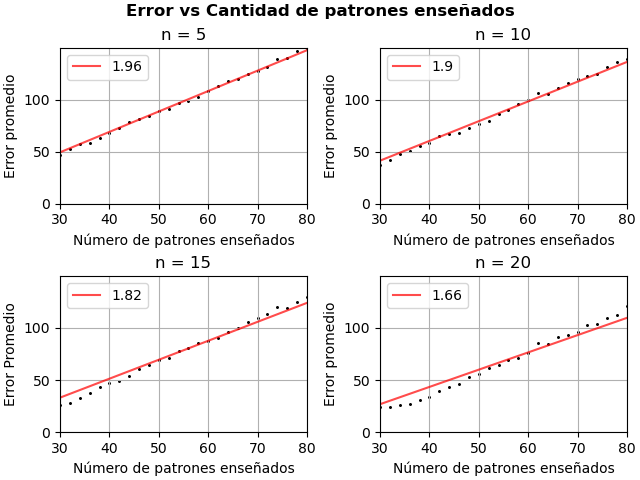

In [11]:
fig, axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)

fit_5 = np.polyfit(np.array(C[5]['P']), np.array(C[5]['Error']), 1)
fit_5eq = fit_5[0]*np.array(C[5]['P'])+fit_5[1]

axes[0, 0].set_title('n = 5')
axes[0, 0].set_ylabel('Error promedio')
axes[0, 0].set_xlabel('Número de patrones enseñados')
axes[0, 0].scatter(C[5]['P'], C[5]['Error'], color='k', s=1.3)
axes[0, 0].plot(C[5]['P'], fit_5eq, color='r', alpha=0.7, label=str(round(fit_5[0], 2)))
axes[0, 0].legend(loc='upper left')
axes[0, 0].set(xlim=(30, 80), ylim=(0, max(C[5]['Error'])))
axes[0, 0].grid()


C10 = np.array(C[10]['Error'])
C10[np.isnan(C10)] = 0
C10_ = C10
#C10_ = C10[~np.isnan(C10)]
fit_10 = np.polyfit(np.array(C[10]['P'][len(C10)-len(C10_):]), C10_, 1)
fit_10eq = fit_10[0]*np.array(C[10]['P'])+fit_10[1]

axes[0, 1].set_title('n = 10')
axes[0, 1].set_ylabel('Error promedio')
axes[0, 1].set_xlabel('Número de patrones enseñados')
axes[0, 1].scatter(C[10]['P'], C[10]['Error'], color='k', s=1.3)
axes[0, 1].plot(C[10]['P'], fit_10eq, color='r', alpha=0.7, label= str(round(fit_10[0], 2)))
axes[0, 1].legend(loc='upper left')
axes[0, 1].set(xlim=(30, 80), ylim=(0, max(C[5]['Error'])))
axes[0, 1].grid()

C15 = np.array(C[15]['Error'])
C15[np.isnan(C15)] = 0
C15_ = C15
#C15_ = C15[~np.isnan(C15)]
fit_15 = np.polyfit(np.array(C[10]['P'][len(C15)-len(C15_):]), C15_, 1)
fit_15eq = fit_15[0]*np.array(C[15]['P'])+fit_15[1]

axes[1, 0].set_title('n = 15')
axes[1, 0].set_ylabel('Error Promedio')
axes[1, 0].set_xlabel('Número de patrones enseñados')
axes[1, 0].scatter(C[15]['P'], C[15]['Error'], color='k', s=1.3)
axes[1, 0].plot(C[10]['P'], fit_15eq, color='r', alpha=0.7, label= str(round(fit_15[0], 2)))
axes[1, 0].legend(loc='upper left')
axes[1, 0].set(xlim=(30, 80), ylim=(0, max(C[5]['Error'])))
axes[1, 0].grid()

C20 = np.array(C[20]['Error'])
C20[np.isnan(C20)] = 0
C20_ = C20
#C20_ = C20[~np.isnan(C20)]
fit_20 = np.polyfit(np.array(C[20]['P'][len(C20)-len(C20_):]), C20_, 1)
fit_20eq = fit_20[0]*np.array(C[20]['P'])+fit_20[1]

axes[1, 1].set_title('n = 20')
axes[1, 1].set_ylabel('Error promedio')
axes[1, 1].set_xlabel('Número de patrones enseñados')
axes[1, 1].scatter(C[20]['P'], C[20]['Error'], color='k', s=1.3)
axes[1, 1].plot(C[20]['P'], fit_20eq, color='r', alpha=0.7, label= str(round(fit_20[0], 2)))
axes[1, 1].legend(loc='upper left')
axes[1, 1].set(xlim=(30, 80), ylim=(0, max(C[5]['Error'])))
axes[1, 1].grid()

fig.suptitle('Error vs Cantidad de patrones enseñados',fontweight ="bold")
plt.show()

Además, el perceptrón simple comete mayor error (pendiente del ajuste realizado a cada curva) al intentar clasificar la misma cantidad de patrones (generados de manera aleatoria) de menor longitud. Esto es, a menor longitud para una misma cantidad patrones enseñados, mayor error comete al aprenderlos. 

Ahora, se quiere ver que ocurre con la tasa de aprendizaje en función del número de patrones enseñados para una longitud fija y diferente valores de la constante de aprendizaje $\eta$.

In [12]:
K = {}
N = 20
K[N] = {}
for eta in range(10,100,20):
    eta = eta/100
    K[N][eta] = {}
    P = []
    Y = []
    Error = []
    for p in range(2,82,2):
        AP = 0
        Error_ = []
        for i in range(100):
            x = [np.where(np.random.randint(2, size=N) == 0, -1, 1) for n in range(p)]
            y = np.where(np.random.randint(2, size=p) == 0, -1, 1)
            if perceptron_train(x, y, eta) == 0:
                AP += 1
            else:
                Error_.append(perceptron_train(x, y, eta))
        P.append(p)
        Y.append(AP/100)
        Error.append(np.mean(np.array(Error_)))
    K[N][eta]['AP/REP'] = Y
    K[N][eta]['P'] = P
    K[N][eta]['Error'] = Error

<IPython.core.display.Javascript object>


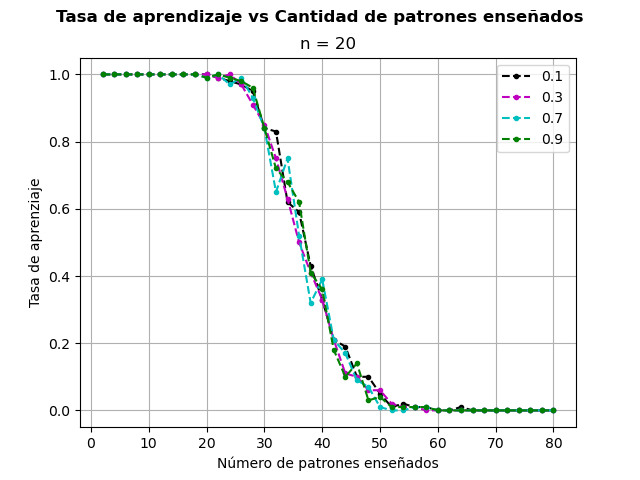

In [13]:
fig, axes = plt.subplots()

axes.set_title('n = 20')
axes.set_ylabel('Tasa de aprenziaje')
axes.set_xlabel('Número de patrones enseñados')
axes.plot(K[20][0.1]['P'], K[20][0.1]['AP/REP'], '.--k', label='0.1')
axes.plot(K[20][0.3]['P'], K[20][0.3]['AP/REP'], '.--m', label='0.3')
axes.plot(K[20][0.7]['P'], K[20][0.7]['AP/REP'], '.--c', label='0.7')
axes.plot(K[20][0.9]['P'], K[20][0.9]['AP/REP'], '.--g', label='0.9')
axes.legend()
axes.grid()


fig.suptitle('Tasa de aprendizaje vs Cantidad de patrones enseñados',fontweight ="bold")
plt.show()

Por lo tanto, no se observa una diferencia significativa en la relación de la tasa de aprendizaje con constate de aprendizaje $\eta$.

### 3.3 

### a) Implemente un perceptrón multicapa que aprenda la función lógica XOR de 2 y de 4 entradas (utilizando el algoritmo Backpropagation).


Para que el perceptrón aprenda la función lógica XOR de 2 y 4 entradas, es necesario implementar el algoritmo de Backpropagation en un perceptrón multicapa. Es por esto, que definimos una nueva función, la cual permite crear un perceptrón de dos capas con N cantidad de neuronas en la capa oculta.

In [14]:
def perceptron_2layers_train(x, y, N, eta, error):
    x = np.array([np.append(item, 1) for item in x]) 
    W = [np.random.normal(0, 1, N+1)]
    W.insert(0, [np.random.normal(0, 1,int(np.size(x)/len(x))) for i in range(N)])
    
    h_j = []
    h_i = []
    for l, item in enumerate(x):
        for m, weights in enumerate(W):
            if m == 0:
                h_j.append([np.dot(weights[n], item) for n in range(len(weights))])
                V = np.tanh(h_j)
            else:
                h_i.append(np.dot(weights[:-1], V[l]) + weights[-1])
                O = np.tanh(h_i)
    z = y -O
    E = sum([z[i]**2 for i in range(len(y))])/len(y)
    
    while E > error:
        delta_i = np.array([z[i]*(1-math.tanh(h_i[i])**2) for i in range(len(y))])
        delta_j = np.array([np.array([delta_i[i]*W[1][j]*(1-math.tanh(h_j[i][j])**2) 
                                      for j in range(N)]) for i in range(len(y))])
        
        for i in range(len(y)):
            for l in range(len(W)-1, -1, -1):
                for j in range(len(W[l])):
                    if l == 1:
                        if j < len(W[l])-1:
                            W[l][j] += eta*delta_i[i]*V[i][j]
                        else:
                            W[l][j] += eta*delta_i[i]
                    else:
                        for k in range(len(W[l][j])):
                            W[l][j][k] += eta*delta_j[i][j]*x[i][k]
                            
        h_j = []
        h_i = []
        for l, item in enumerate(x):
            for m, weights in enumerate(W):
                if m == 0:
                    h_j.append([np.dot(weights[n], item) for n in range(len(weights))])
                    V = np.tanh(h_j)
                else:
                    h_i.append(np.dot(weights[:-1], V[l]) + weights[-1])
                    O = np.tanh(h_i)
        z = y -O
        E = sum([z[i]**2 for i in range(len(y))])/len(y)
    return W

def perceptron_2layers(x, y, W):
    x = np.array([np.append(item, 1) for item in x])
    h_j = []
    h_i = []
    for l, item in enumerate(x):
        for m, weights in enumerate(W):
            if m == 0:
                h_j.append([np.dot(weights[n], item) for n in range(len(weights))])
                V = np.tanh(h_j)
            else:
                h_i.append(np.dot(weights[:-1], V[l]) + weights[-1])
                O = np.tanh(h_i)
    return O

Luego se procede a entrenar y evaluar la red con la función lógica XOR de 2 y de 4 entradas respectivamente.

**Función logica XOR**

- Dos entradas

In [15]:
x = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = np.array([-1, 1, 1, -1])

N = 2
eta = 0.1
error = 0.001

O = perceptron_2layers(x, y, W = perceptron_2layers_train(x, y, N, eta, error))
O

array([-0.97376021,  0.96446126,  0.96321783, -0.97363597])

In [16]:
np.round(O).astype(int) == y

array([ True,  True,  True,  True])

- Cuatro entradas

In [17]:
x = np.array([[-1, -1, -1, -1], [-1, -1, -1, 1], [-1, -1, 1, -1], [-1, 1, -1, -1], [1, -1, -1, -1], [-1, -1, 1, 1], 
              [1, 1, -1, -1], [-1, 1, -1, 1], [1, -1, 1, -1],[-1, 1, 1, -1], [1, -1, -1, 1], [-1, 1, 1, 1], 
              [1, 1, 1, -1], [1,-1, 1, 1], [1, 1, -1, 1], [1, 1, 1, 1]])

y = np.array([-1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1])

N = 8
eta = 0.1
error = 0.001

O = perceptron_2layers(x, y, W = perceptron_2layers_train(x, y, N, eta, error))
O

array([-0.986855  ,  0.99994366,  0.95180982,  0.99832166,  0.97047357,
       -0.97873931, -0.9533109 , -0.9967837 , -0.98776373, -0.93396118,
       -0.96221276,  0.95622391,  0.99509532,  0.99998961,  0.96303332,
       -0.9734293 ])

In [18]:
np.round(O).astype(int) == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

### b) Muestre cómo evoluciona el error durante el entrenamiento.

Ahora modificamos la función de entrenamiento del perceptrón de dos capas, para mostrar como evoluciona el error durante este proceso.

In [19]:
def perceptron_2layers_train(x, y, N, eta, error):
    x = np.array([np.append(item, 1) for item in x])
    W = [np.random.normal(0, 1, N+1)]
    W.insert(0, [np.random.normal(0, 1,int(np.size(x)/len(x))) for i in range(N)])
    
    h_j = []
    h_i = []
    for l, item in enumerate(x):
        for m, weights in enumerate(W):
            if m == 0:
                h_j.append([np.dot(weights[n], item) for n in range(len(weights))])
                V = np.tanh(h_j)
            else:
                h_i.append(np.dot(weights[:-1], V[l]) + weights[-1])
                O = np.tanh(h_i)
    z = y -O
    Error = []
    E = sum([z[i]**2 for i in range(len(y))])/len(y)
    Error.append(E)
    while E > error:
        delta_i = np.array([z[i]*(1-math.tanh(h_i[i])**2) for i in range(len(y))])
        delta_j = np.array([np.array([delta_i[i]*W[1][j]*(1-math.tanh(h_j[i][j])**2) 
                                      for j in range(N)]) for i in range(len(y))])
        
        for i in range(len(y)):
            for l in range(len(W)-1, -1, -1):
                for j in range(len(W[l])):
                    if l == 1:
                        if j < len(W[l])-1:
                            W[l][j] += eta*delta_i[i]*V[i][j]
                        else:
                            W[l][j] += eta*delta_i[i]
                    else:
                        for k in range(len(W[l][j])):
                            W[l][j][k] += eta*delta_j[i][j]*x[i][k]
                            
        h_j = []
        h_i = []
        for l, item in enumerate(x):
            for m, weights in enumerate(W):
                if m == 0:
                    h_j.append([np.dot(weights[n], item) for n in range(len(weights))])
                    V = np.tanh(h_j)
                else:
                    h_i.append(np.dot(weights[:-1], V[l]) + weights[-1])
                    O = np.tanh(h_i)
        z = y - O
        E = sum([z[i]**2 for i in range(len(y))])/len(y)
        Error.append(E)
    return Error

In [24]:
x = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = np.array([-1, 1, 1, -1])

N = 2
eta = 0.1
error = 0.001

Error = perceptron_2layers_train(x, y, N, eta, error)

<IPython.core.display.Javascript object>


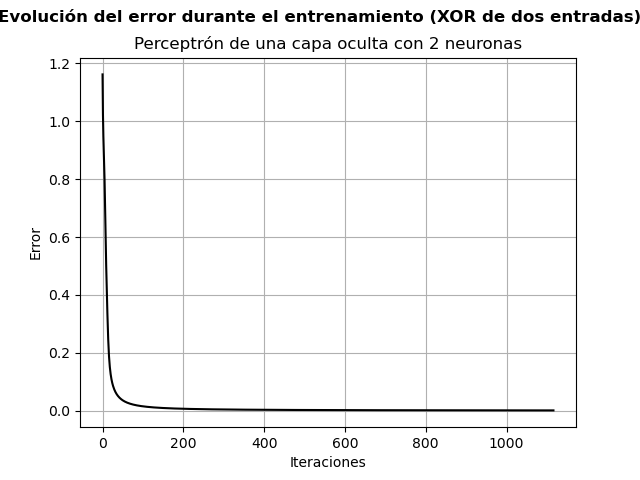

In [25]:
fig, ax = plt.subplots()

fig.suptitle('Evolución del error durante el entrenamiento (XOR de dos entradas)',fontweight ="bold")
ax.set_title('Perceptrón de una capa oculta con 2 neuronas')
ax.set_ylabel('Error')
ax.set_xlabel('Iteraciones')
ax.plot(Error,'k')

plt.grid()
plt.show()